In [57]:
# Importações 

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from src.config import CLEANED_DATA_FILEPATH
from src.utils import count_outliers

In [58]:
# Obtendo os dados como DataFrame
df = pd.read_parquet(CLEANED_DATA_FILEPATH)
df.head()

,rotulo,FOS_FOS_Mean,FOS_FOS_Variance,FOS_FOS_Median,FOS_FOS_Mode,FOS_FOS_Skewness,FOS_FOS_Kurtosis,FOS_FOS_Energy,FOS_FOS_Entropy,FOS_FOS_MinimalGrayLevel,...,tex_laplacian_std,tex_entropia,tex_suavidade,tex_uniformidade,meta_tamanho_bytes,meta_tamanho_kb,comp_variancia_blocos,comp_media_blocos,comp_energia_dct,comp_coef_dc
0,manipulado,22.745659,310.826241,17.0,17.0,6.975735,65.992026,0.494363,1.140282,17.0,...,22.076431,1.139742,0.996780,0.490508,35319,34.491211,9.247067,2.752584,3.950087e+08,15697.0950
1,manipulado,2.852302,423.482420,0.0,0.0,8.327513,76.341420,0.951592,0.259459,0.0,...,31.562840,0.262360,0.997635,0.944172,27936,27.281250,13.897900,3.541544,2.063520e+08,1968.4136
2,manipulado,54.046034,3412.467306,0.0,0.0,0.262052,1.433904,0.287129,2.386470,0.0,...,29.688532,2.381062,0.999706,0.284890,128698,125.681641,15.709027,4.631431,3.022698e+09,37297.9180
3,manipulado,2.624307,372.246170,0.0,0.0,8.687468,85.000807,0.954012,0.248639,0.0,...,29.970658,0.251582,0.997310,0.946573,27264,26.625000,13.599282,3.397348,1.812600e+08,1811.0712
4,manipulado,54.129428,3414.554278,0.0,0.0,0.261521,1.438942,0.286137,2.394278,0.0,...,30.345632,2.388839,0.999706,0.283906,128864,125.843750,16.027229,4.811873,3.027993e+09,37355.4730


In [59]:
# Resumo da base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 63 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   rotulo                                        194 non-null    object 
 1   FOS_FOS_Mean                                  194 non-null    float64
 2   FOS_FOS_Variance                              194 non-null    float64
 3   FOS_FOS_Median                                194 non-null    float64
 4   FOS_FOS_Mode                                  194 non-null    float64
 5   FOS_FOS_Skewness                              194 non-null    float64
 6   FOS_FOS_Kurtosis                              194 non-null    float64
 7   FOS_FOS_Energy                                194 non-null    float64
 8   FOS_FOS_Entropy                               194 non-null    float64
 9   FOS_FOS_MinimalGrayLevel                      194 non-null    flo

Iremos analisar as colunas por natureza. Para as colunas de natureza numérica, veremos o histograma e o boxplot. Já as colunas de natureza categórica, iremos verificar a contagem dos valores (histograma)

As colunas de natureza numérica serão aquelas que possuem mais de 10 valores únicos, e as categóricas serão aqueles que não satisfazem essa condição

In [60]:
# Definindo as colunas por natureza

numeric_columns = df.columns.sort_values()[df.nunique().sort_index() > 10].to_list()

categoric_columns = df.columns.difference(numeric_columns).to_list()

In [61]:
len(numeric_columns)

49

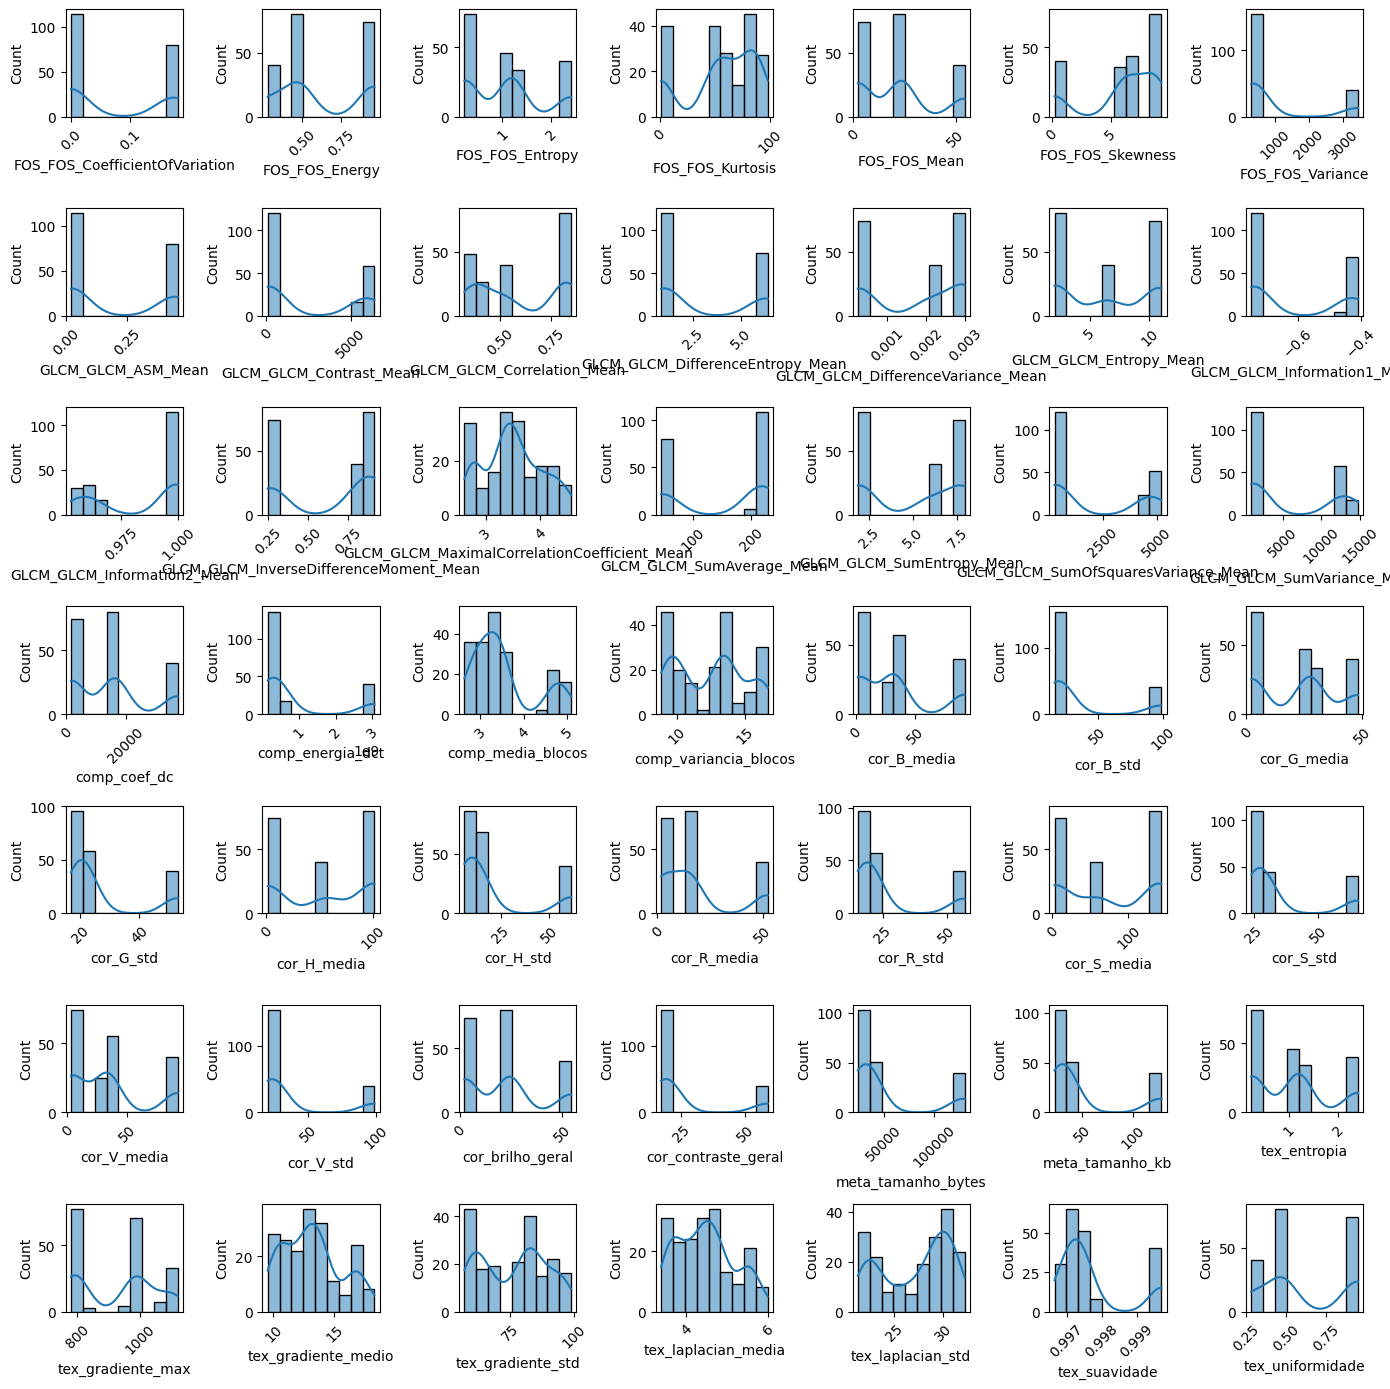

In [62]:
# Histogramas das colunas numéricas

fig, axs = plt.subplots(7, 7, figsize=(14, 14))

for ax, column in zip(axs.flatten(), numeric_columns):

    sns.histplot(
        data=df,
        x=column,
        bins="sturges",
        kde=True,
        ax=ax,
    )

    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

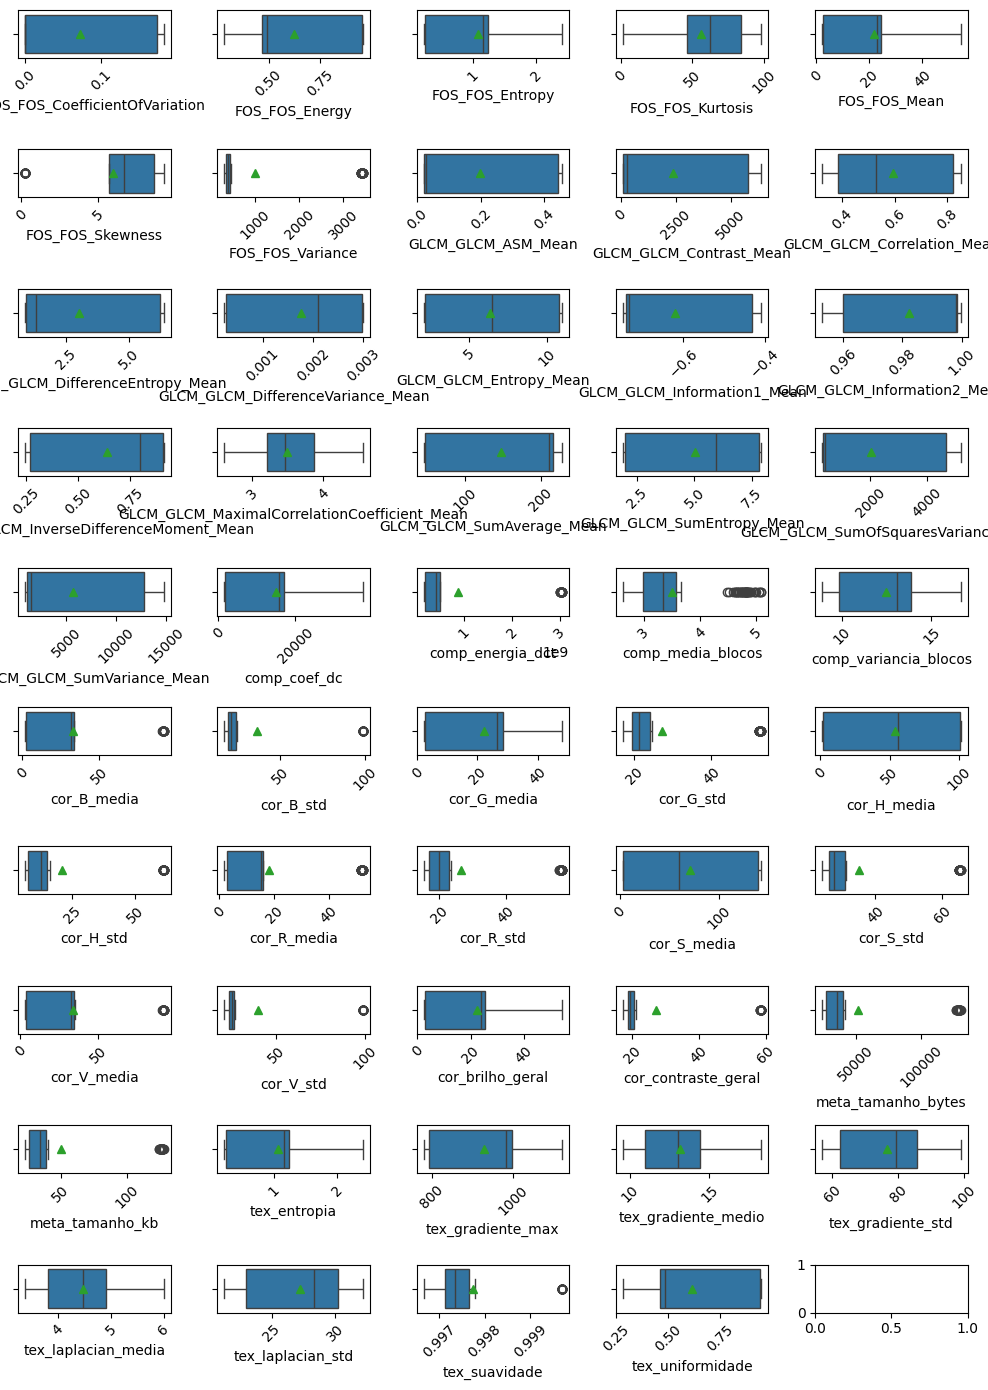

In [63]:
# Boxplots das colunas numéricas

fig, axs = plt.subplots(10, 5, figsize=(10, 14))

for ax, column in zip(axs.flatten(), numeric_columns):

    sns.boxplot(
        data=df,
        x=column,
        showmeans=True,
        ax=ax,
    )

    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [64]:
# Verificando a quantidade de ouliers de cada coluna numérica

for column in numeric_columns:

    num_outliers = count_outliers(df, column)

    if num_outliers != 0:

        print(column, num_outliers)

FOS_FOS_Skewness 40
FOS_FOS_Variance 40
comp_energia_dct 40
comp_media_blocos 40
cor_B_media 40
cor_B_std 40
cor_G_std 40
cor_H_std 40
cor_R_media 40
cor_R_std 40
cor_S_std 40
cor_V_media 40
cor_V_std 40
cor_contraste_geral 40
meta_tamanho_bytes 40
meta_tamanho_kb 40
tex_suavidade 40


Algumas colunas apresentam outliers que poderiam ser ruidos. Porém, como a quantidade de ocorrências desses outliers é alta, e nós temos poucos registros da classe minoritária, não iremos removê-los da base.

In [65]:
len(categoric_columns)

14

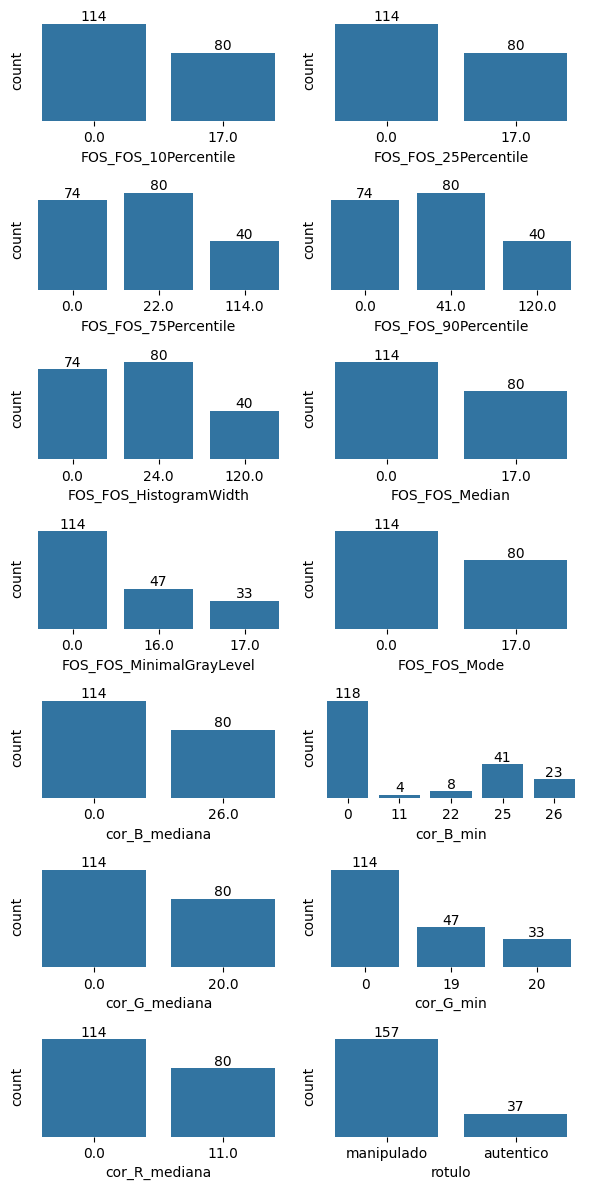

In [66]:
# Contagem de valores das colunas categóricas

fig, axs = plt.subplots(7, 2, figsize=(6, 12))

for ax, column in zip(axs.flatten(), categoric_columns):

    sns.countplot(
        df,
        x=column,
        ax=ax,
    )

    for container in ax.containers:

        ax.bar_label(container)
    
    ax.set_frame_on(False)

    ax.set_yticks([])

plt.tight_layout()
plt.show()

Quase todas as colunas categóricas apresentam muitas ocorrências em zero.

Além disso, a coluna `cor_B_min` apresenta valores com baixa representatividade para a base.

Logo, optarei por agregar todas as categorias com valores diferentes de zero em uma única categoria "non_zero".

In [67]:
# Agregando as categorias das colunas categóricas

categoric_columns_without_target = categoric_columns.copy()
categoric_columns_without_target.pop(
    categoric_columns_without_target.index("rotulo")
)

for column in categoric_columns_without_target:

    df[column] = df[column].apply(lambda x: "zero" if x == 0 else "non_zero")

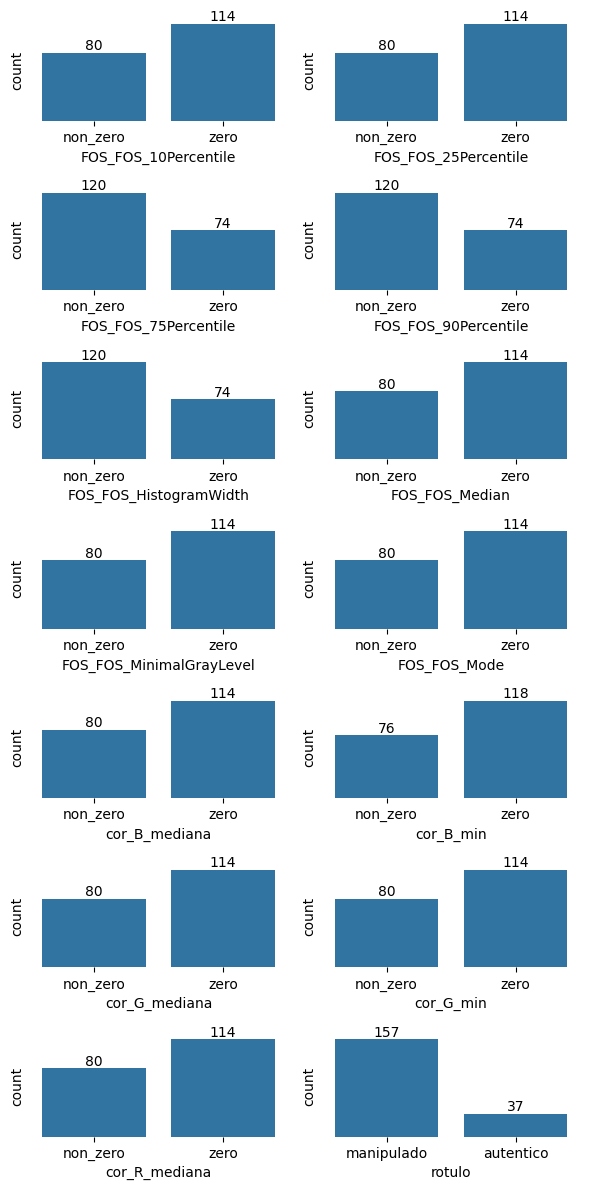

In [68]:
# Contagem de valores das colunas categóricas

fig, axs = plt.subplots(7, 2, figsize=(6, 12))

for ax, column in zip(axs.flatten(), categoric_columns):

    sns.countplot(
        df,
        x=column,
        ax=ax,
    )

    for container in ax.containers:

        ax.bar_label(container)
    
    ax.set_frame_on(False)

    ax.set_yticks([])

plt.tight_layout()
plt.show()

In [69]:
# Salvando as modificações
df.to_parquet(CLEANED_DATA_FILEPATH, index=False)